In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# imdb.title.basics

In [2]:
title_basics = pd.read_csv("data/imdb.title.basics.csv.gz")
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Check it out

In [3]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


**Duplicates**

In [4]:
title_basics[title_basics.duplicated()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


**Missing values**

In [5]:
title_basics["genres"].isna().sum() / len(title_basics) * 100

3.7004598204510617

In [6]:
title_basics["runtime_minutes"].isna().sum() / len(title_basics) * 100

21.71762097657105

**Right now, I only care about tconst (PK), runtime_minutes, and genres**

In [7]:
title_basics.drop(columns=["primary_title", "original_title", "start_year"], inplace=True)

In [8]:
title_basics.head()

,tconst,runtime_minutes,genres
0,tt0063540,175.0,"Action,Crime,Drama"
1,tt0066787,114.0,"Biography,Drama"
2,tt0069049,122.0,Drama
3,tt0069204,NaN,"Comedy,Drama"
4,tt0100275,80.0,"Comedy,Drama,Fantasy"


How many genres are there?

In [9]:
genres = []
for i in range(len(title_basics)):
    if type(title_basics.genres[i]) == str:
        gen = title_basics.genres[i].split(",")
        for g in gen:
            if g not in genres:
                genres.append(g)

In [10]:
print(len(genres))
genres

27


['Action',
 'Crime',
 'Drama',
 'Biography',
 'Comedy',
 'Fantasy',
 'Horror',
 'Thriller',
 'Adventure',
 'Animation',
 'Documentary',
 'History',
 'Mystery',
 'Sci-Fi',
 'Romance',
 'Family',
 'War',
 'Music',
 'Sport',
 'Western',
 'Musical',
 'Adult',
 'News',
 'Talk-Show',
 'Reality-TV',
 'Game-Show',
 'Short']

Create columns for those genres

In [11]:
action = []
crime = []
drama = []
biography = []
comedy = []
fantasy = []
horror = []
thriller = []
adventure = []
animation = []
documentary = []
history = []
mystery = []
scifi = []
romance = []
family = []
war = []
music = []
sport = []
western = []
musical = []
adult = []
news = []
talk_show = []
reality_TV = []
game_show = []
short = []

list_genres = [action, crime, drama, biography, comedy, fantasy, horror, thriller, adventure, animation,
               documentary, history, mystery, scifi, romance, family, war, music, sport, western, musical,
               adult, news, talk_show, reality_TV, game_show, short]

list_genres_names = ["action", "crime", "drama", "biography", "comedy", "fantasy", "horror", "thriller",
                     "adventure", "animation", "documentary", "history", "mystery", "scifi", "romance",
                     "family", "war", "music", "sport", "western", "musical", "adult", "news", "talk_show",
                     "reality_TV", "game_show", "short"]

In [12]:
def give_one(list_genres, index):
    list_genres[index].append(1)

In [13]:
def give_zeros(list_genres, list_i):
    for i in range(27):
        if i not in list_i:
            list_genres[i].append(0)

In [14]:
def fill_all_zeros(list_genres):
    for i in range(27):
        list_genres[i].append(0)

In [15]:
for i in range(len(title_basics)):
    if type(title_basics.genres[i]) == str:
        gen = title_basics.genres[i].split(",")
        list_i = []
        for g in gen:
            g = g.lower()
            if g == "sci-fi":
                g = "scifi"
            elif g == "talk-show":
                g = "talk_show"
            elif g == "reality-tv":
                g = "reality_TV"
            elif g == "game-show":
                g = "game_show"
            index = list_genres_names.index(g)
            give_one(list_genres, index)
            list_i.append(index)
        give_zeros(list_genres, list_i)
    else:
        fill_all_zeros(list_genres)

In [16]:
title_basics["action"] = action
title_basics["crime"] = crime
title_basics["drama"] = drama
title_basics["biography"] = biography
title_basics["comedy"] = comedy
title_basics["fantasy"] = fantasy
title_basics["horror"] = horror
title_basics["thriller"] = thriller
title_basics["adventure"] = adventure
title_basics["animation"] = animation
title_basics["documentary"] = documentary
title_basics["history"] = history
title_basics["mystery"] = mystery
title_basics["scifi"] = scifi
title_basics["romance"] = romance
title_basics["family"] = family
title_basics["war"] = war
title_basics["music"] = music
title_basics["sport"] = sport
title_basics["western"] = western
title_basics["musical"] = musical
title_basics["adult"] = adult
title_basics["news"] = news
title_basics["talk_show"] = talk_show
title_basics["reality_TV"] = reality_TV
title_basics["game_show"] = game_show
title_basics["short"] = short

Check to see if everything we have to this point is correct

In [17]:
title_basics.head()

,tconst,runtime_minutes,genres,action,crime,drama,biography,comedy,fantasy,horror,...,music,sport,western,musical,adult,news,talk_show,reality_TV,game_show,short
0,tt0063540,175.0,"Action,Crime,Drama",1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,114.0,"Biography,Drama",0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,122.0,Drama,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,NaN,"Comedy,Drama",0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,80.0,"Comedy,Drama,Fantasy",0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
title_basics.tail()

,tconst,runtime_minutes,genres,action,crime,drama,biography,comedy,fantasy,horror,...,music,sport,western,musical,adult,news,talk_show,reality_TV,game_show,short
146139,tt9916538,123.0,Drama,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146140,tt9916622,NaN,Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146141,tt9916706,NaN,Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
146142,tt9916730,116.0,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146143,tt9916754,NaN,Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Looks good

Now, we don't need the genres column anymore

In [19]:
title_basics.drop(columns="genres", inplace=True)

# imdb.title.ratings

In [20]:
title_ratings = pd.read_csv("data/imdb.title.ratings.csv.gz")
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [21]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [22]:
title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


# merge two df's

In [23]:
df = title_basics.merge(title_ratings, how='inner', on="tconst")
df.head()

,tconst,runtime_minutes,action,crime,drama,biography,comedy,fantasy,horror,thriller,...,western,musical,adult,news,talk_show,reality_TV,game_show,short,averagerating,numvotes
0,tt0063540,175.0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.0,77
1,tt0066787,114.0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,7.2,43
2,tt0069049,122.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.9,4517
3,tt0069204,NaN,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6.1,13
4,tt0100275,80.0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,6.5,119


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 31 columns):
tconst             73856 non-null object
runtime_minutes    66236 non-null float64
action             73856 non-null int64
crime              73856 non-null int64
drama              73856 non-null int64
biography          73856 non-null int64
comedy             73856 non-null int64
fantasy            73856 non-null int64
horror             73856 non-null int64
thriller           73856 non-null int64
adventure          73856 non-null int64
animation          73856 non-null int64
documentary        73856 non-null int64
history            73856 non-null int64
mystery            73856 non-null int64
scifi              73856 non-null int64
romance            73856 non-null int64
family             73856 non-null int64
war                73856 non-null int64
music              73856 non-null int64
sport              73856 non-null int64
western            73856 non-null int64
musical 

In [25]:
df["runtime_minutes"].isna().sum() / len(df) * 100

10.317374350086656

# EDA

In [26]:
df.runtime_minutes.describe()

count    66236.000000
mean        94.654040
std        208.574111
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

According to [this](https://www.imdb.com/list/ls058680475/), some films can last more than 500 min (the longest one on the list goes up to 14,400 min).

In [27]:
len(df[df.runtime_minutes > 162]) # the longest I've seen is 2h 42m (Avatar)

614

Holy...

In [28]:
len(df[df.runtime_minutes >= 14400])

2

In [29]:
len(df[df.runtime_minutes > 14400])

1

/home/nt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


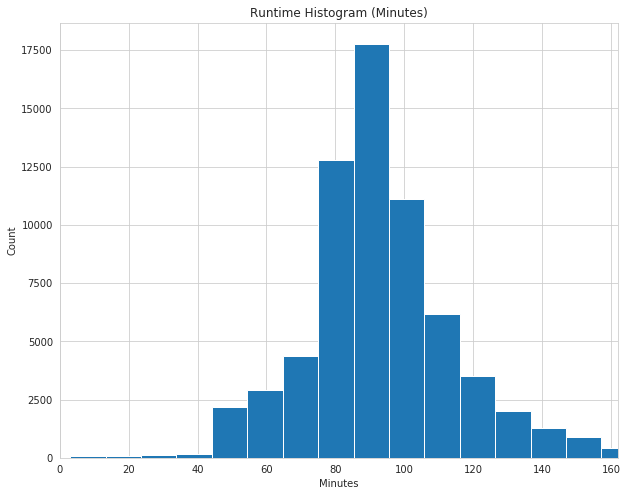

In [30]:
# let's do a quick histogram
# cut off at Avatar
fig = plt.figure(figsize=(10,8))
plt.hist(df.runtime_minutes, bins=5000)
plt.xlim(0, 162);
plt.title("runtime histogram (minutes)".title())
plt.xlabel("Minutes")
plt.ylabel("Count")
plt.show()

So that makes sense that most of the movies last about 1.5 hours.

Let's try this:
- short film: < 45 min
- normal film: 45-200 min
- long film: > 200 min

In [31]:
short_run_movies = df[df.runtime_minutes < 45]
normal_run_movies = df[(df.runtime_minutes >= 45) & (df.runtime_minutes <= 200)]
long_run_movies = df[df.runtime_minutes > 200]

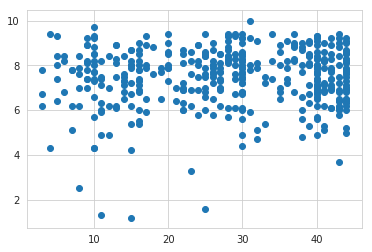

In [32]:
plt.scatter(short_run_movies.runtime_minutes, short_run_movies.averagerating)

In [33]:
short_run_movies.averagerating.describe()

count    407.000000
mean       7.471007
std        1.310528
min        1.200000
25%        6.800000
50%        7.700000
75%        8.400000
max       10.000000
Name: averagerating, dtype: float64

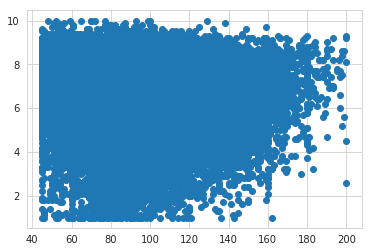

In [34]:
plt.scatter(normal_run_movies.runtime_minutes, normal_run_movies.averagerating)

In [35]:
normal_run_movies.averagerating.describe()

count    65671.00000
mean         6.31231
std          1.45570
min          1.00000
25%          5.50000
50%          6.50000
75%          7.30000
max         10.00000
Name: averagerating, dtype: float64

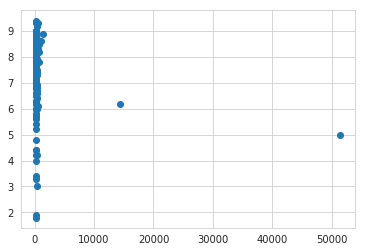

In [36]:
plt.scatter(long_run_movies.runtime_minutes, long_run_movies.averagerating)

In [37]:
long_run_movies.averagerating.describe()

count    158.000000
mean       7.358228
std        1.419079
min        1.800000
25%        6.800000
50%        7.700000
75%        8.400000
max        9.400000
Name: averagerating, dtype: float64

In [38]:
long_movies_no_longest_2 = long_run_movies[long_run_movies.runtime_minutes < 10000]

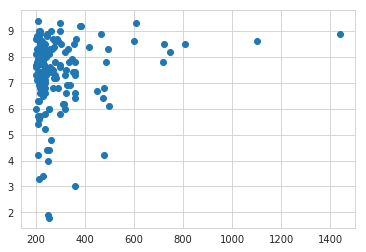

In [39]:
plt.scatter(long_movies_no_longest_2.runtime_minutes, long_movies_no_longest_2.averagerating)

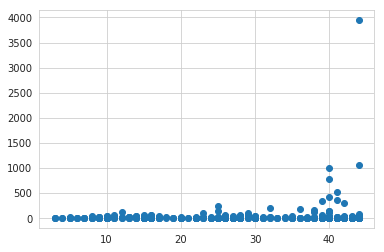

In [40]:
plt.scatter(short_run_movies.runtime_minutes, short_run_movies.numvotes)

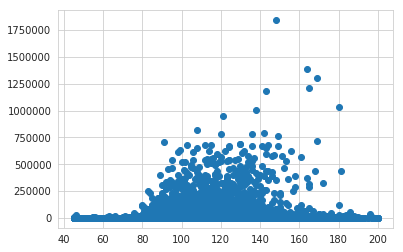

In [41]:
plt.scatter(normal_run_movies.runtime_minutes, normal_run_movies.numvotes)

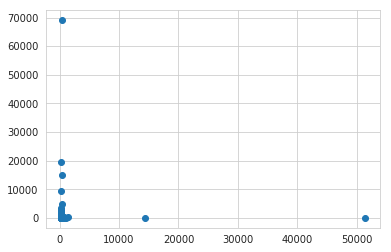

In [42]:
plt.scatter(long_run_movies.runtime_minutes, long_run_movies.numvotes)

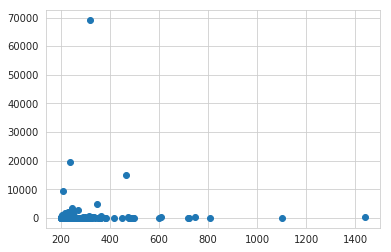

In [43]:
plt.scatter(long_movies_no_longest_2.runtime_minutes, long_movies_no_longest_2.numvotes)

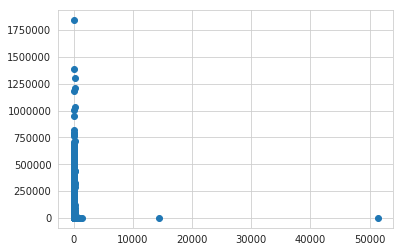

In [44]:
plt.scatter(df.runtime_minutes, df.numvotes)

In [45]:
action_movies = df[df.action == 1]
crime_movies = df[df.crime == 1]
drama_movies = df[df.drama == 1]
biography_movies = df[df.biography == 1]
comedy_movies = df[df.comedy == 1]
fantasy_movies = df[df.fantasy == 1]
horror_movies = df[df.horror == 1]
thriller_movies = df[df.thriller == 1]
adventure_movies = df[df.adventure == 1]
animation_movies = df[df.animation == 1]
documentary_movies = df[df.documentary == 1]
history_movies = df[df.history == 1]
mystery_movies = df[df.mystery == 1]
scifi_movies = df[df.scifi == 1]
romance_movies = df[df.romance == 1]
family_movies = df[df.family == 1]
war_movies = df[df.war == 1]
music_movies = df[df.music == 1]
sport_movies = df[df.sport == 1]
western_movies = df[df.western == 1]
musical_movies = df[df.musical == 1]
adult_movies = df[df.adult == 1]
news_movies = df[df.news == 1]
talk_show_movies = df[df.talk_show == 1]
reality_TV_movies = df[df.reality_TV == 1]
game_show_movies = df[df.game_show == 1]
short_movies = df[df.short == 1]

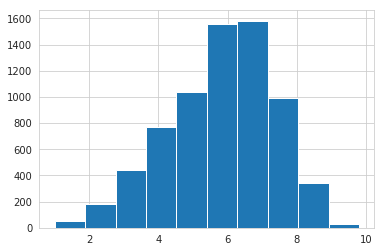

In [46]:
action_movies.averagerating.hist()

In [47]:
len(action_movies)

6988

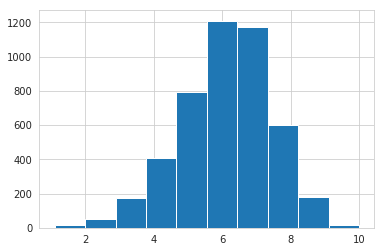

In [48]:
crime_movies.averagerating.hist()

In [49]:
len(crime_movies)

4611

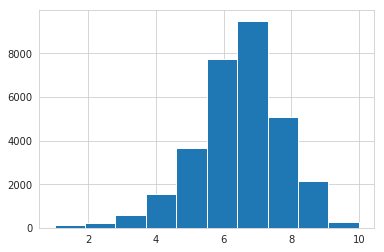

In [50]:
drama_movies.averagerating.hist()

In [51]:
len(drama_movies)

30788

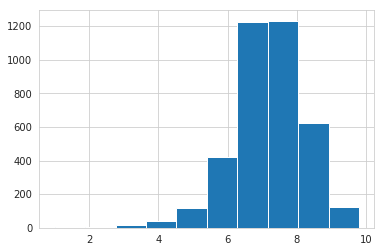

In [52]:
biography_movies.averagerating.hist()

In [53]:
len(biography_movies)

3809

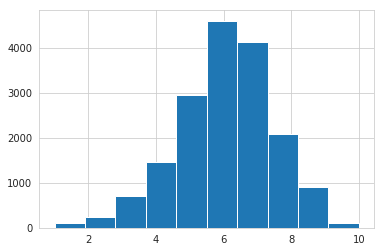

In [54]:
comedy_movies.averagerating.hist()

In [55]:
len(comedy_movies)

17290

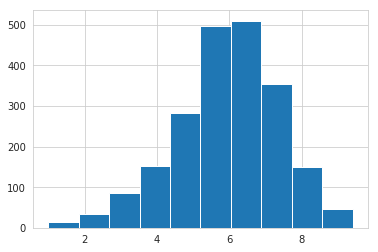

In [56]:
fantasy_movies.averagerating.hist()

In [57]:
len(fantasy_movies)

2126

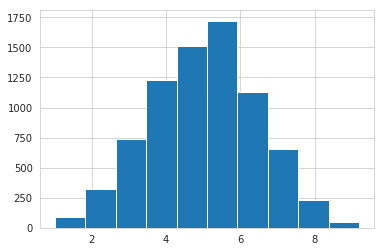

In [58]:
horror_movies.averagerating.hist()

In [59]:
len(horror_movies)

7674

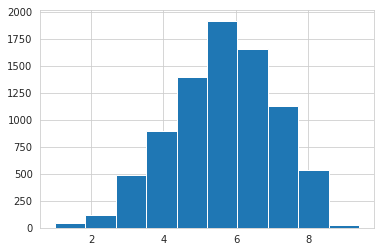

In [60]:
thriller_movies.averagerating.hist()

In [61]:
len(thriller_movies)

8217

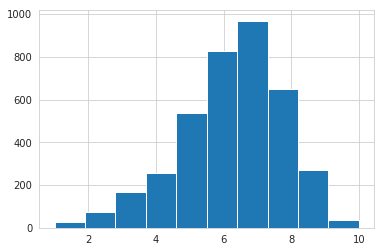

In [62]:
adventure_movies.averagerating.hist()

In [63]:
len(adventure_movies)

3817

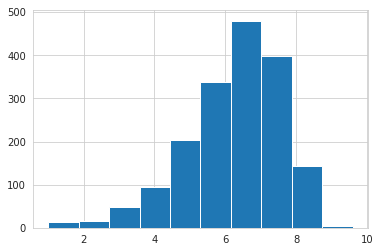

In [64]:
animation_movies.averagerating.hist()

In [65]:
len(animation_movies)

1743

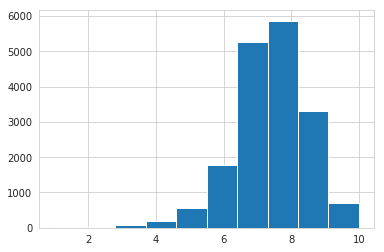

In [66]:
documentary_movies.averagerating.hist()

In [67]:
len(documentary_movies)

17753

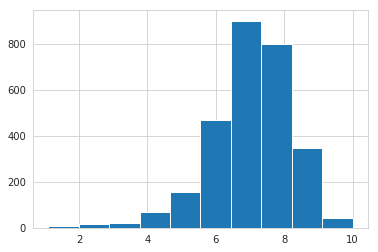

In [68]:
history_movies.averagerating.hist()

In [69]:
len(history_movies)

2825

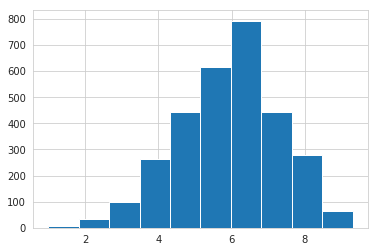

In [70]:
mystery_movies.averagerating.hist()

In [71]:
len(mystery_movies)

3039

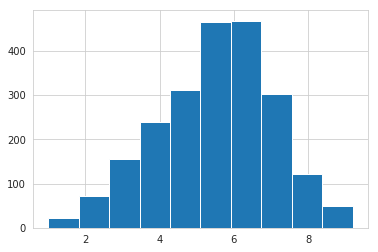

In [72]:
scifi_movies.averagerating.hist()

In [73]:
len(scifi_movies)

2206

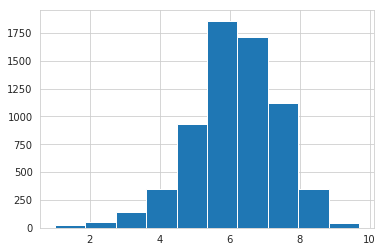

In [74]:
romance_movies.averagerating.hist()

In [75]:
len(romance_movies)

6589

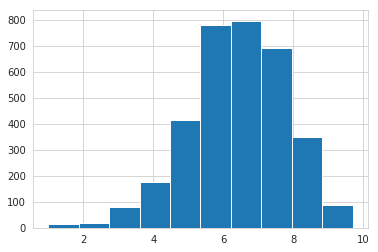

In [76]:
family_movies.averagerating.hist()

In [77]:
len(family_movies)

3412

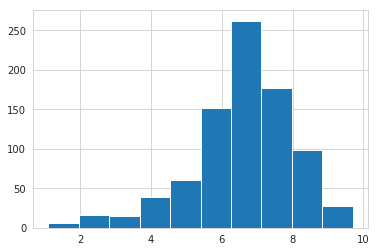

In [78]:
war_movies.averagerating.hist()

In [79]:
len(war_movies)

853

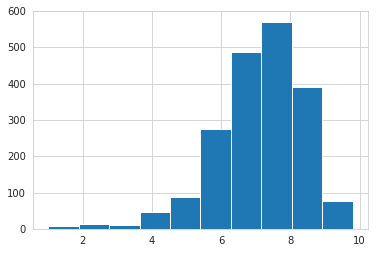

In [80]:
music_movies.averagerating.hist()

In [81]:
len(music_movies)

1968

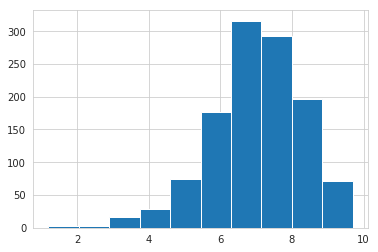

In [82]:
sport_movies.averagerating.hist()

In [83]:
len(sport_movies)

1179

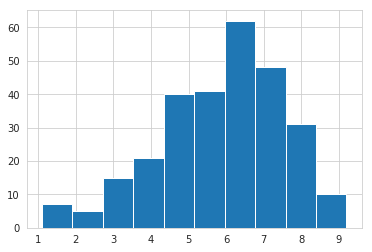

In [84]:
western_movies.averagerating.hist()

In [85]:
len(western_movies)

280

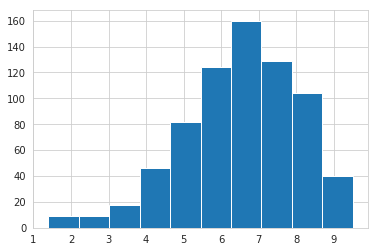

In [86]:
musical_movies.averagerating.hist()

In [87]:
len(musical_movies)

721

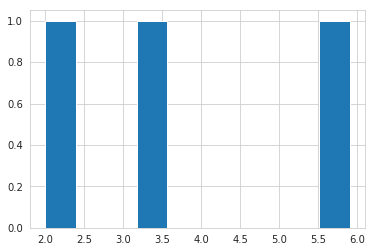

In [88]:
adult_movies.averagerating.hist()

In [89]:
len(adult_movies)

3

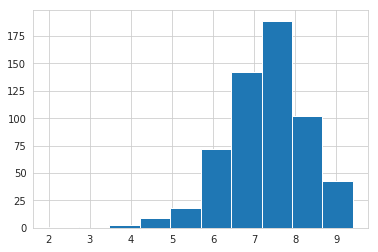

In [90]:
news_movies.averagerating.hist()

In [91]:
len(news_movies)

579

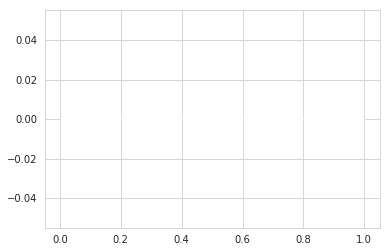

In [92]:
talk_show_movies.averagerating.hist()

In [93]:
len(talk_show_movies)

0

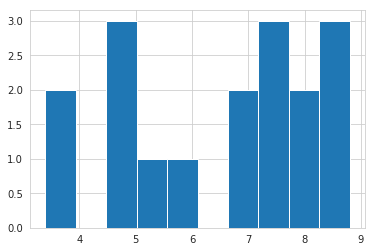

In [94]:
reality_TV_movies.averagerating.hist()

In [95]:
len(reality_TV_movies)

17

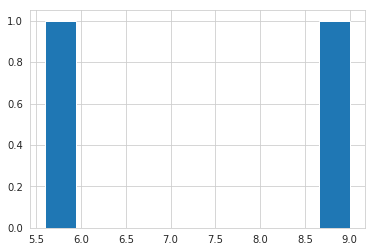

In [96]:
game_show_movies.averagerating.hist()

In [97]:
len(game_show_movies)

2

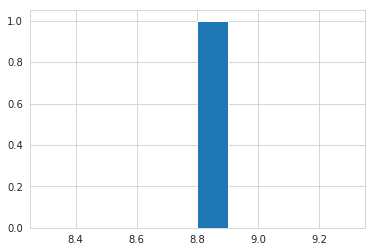

In [98]:
short_movies.averagerating.hist()

In [99]:
len(short_movies)

1

In [100]:
short_movies.runtime_minutes

72472    18.0
Name: runtime_minutes, dtype: float64

In [101]:
list_movies = [action_movies, crime_movies, drama_movies, biography_movies, comedy_movies, fantasy_movies,
               horror_movies, thriller_movies, adventure_movies, animation_movies, documentary_movies,
               history_movies, mystery_movies, scifi_movies, romance_movies, family_movies, war_movies,
               music_movies, sport_movies, western_movies, musical_movies, news_movies]

list_genres_names_new = ["action", "crime", "drama", "biography", "comedy", "fantasy", "horror", "thriller",
                         "adventure", "animation", "documentary", "history", "mystery", "scifi", "romance",
                         "family", "war", "music", "sport", "western", "musical", "news"]

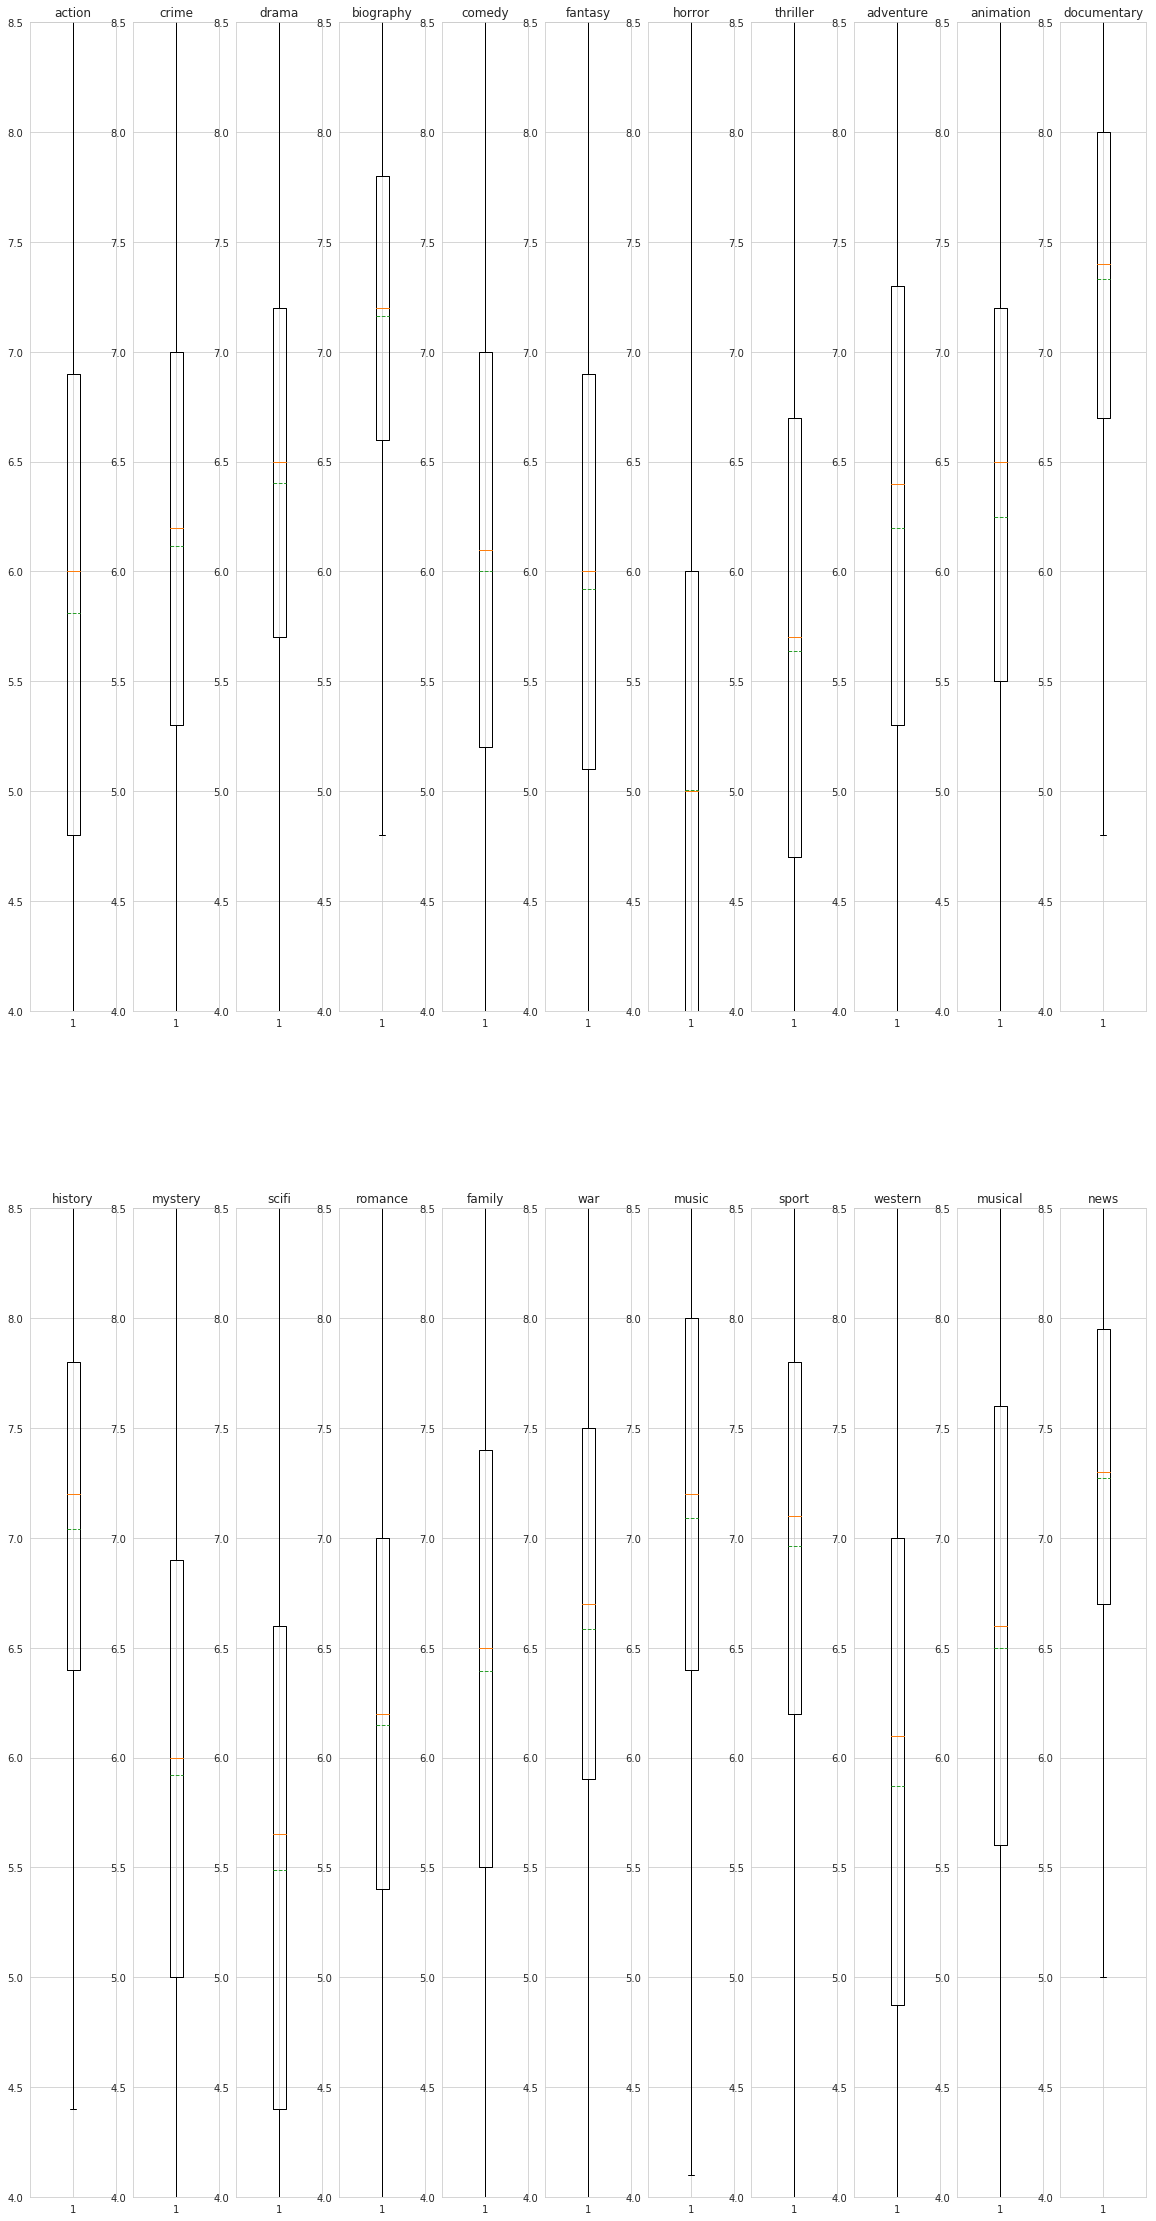

In [102]:
plt.figure(figsize=(20,40))

# note: we're not dealing with adult movies, talk shows, reality TVs, game shows, and short movies
# due to not having enough data in those categories

for index, movie in enumerate(list_movies):
    ax = plt.subplot(2, 11, index+1)
    plt.boxplot(list_movies[index].averagerating, showfliers=False, showmeans=True, meanline=True)
    ax.set_title(list_genres_names_new[index])
    ax.set_ylim(4, 8.5)

In [103]:
list_movies_ave_rate_mean = [action_movies.averagerating.mean(), crime_movies.averagerating.mean(),
                             drama_movies.averagerating.mean(), biography_movies.averagerating.mean(),
                             comedy_movies.averagerating.mean(), fantasy_movies.averagerating.mean(),
                             horror_movies.averagerating.mean(), thriller_movies.averagerating.mean(),
                             adventure_movies.averagerating.mean(), animation_movies.averagerating.mean(),
                             documentary_movies.averagerating.mean(), history_movies.averagerating.mean(),
                             mystery_movies.averagerating.mean(), scifi_movies.averagerating.mean(),
                             romance_movies.averagerating.mean(), family_movies.averagerating.mean(),
                             war_movies.averagerating.mean(), music_movies.averagerating.mean(),
                             sport_movies.averagerating.mean(), western_movies.averagerating.mean(),
                             musical_movies.averagerating.mean(), news_movies.averagerating.mean()]

zipped_pairs = list(zip(list_movies_ave_rate_mean, list_genres_names_new))
zipped_pairs.sort(reverse=True)
names_mean = []
list_mean = []
for i in zipped_pairs:
    list_mean.append(i[0])
    names_mean.append(i[1])

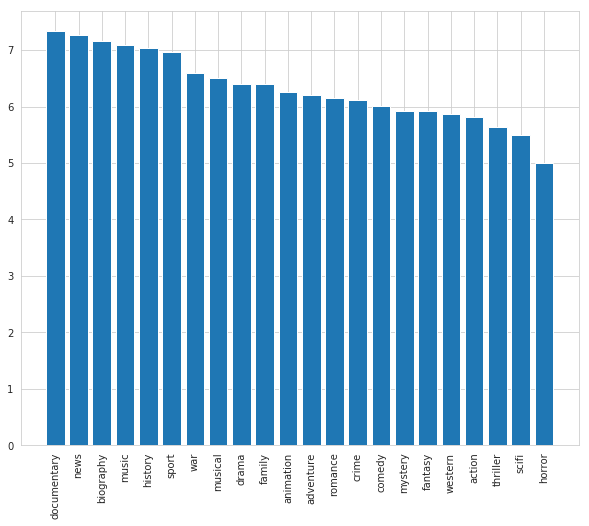

In [104]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_xticks(range(22))
ax.set_xticklabels(names_mean, rotation="vertical")
plt.bar(range(22), list_mean)
plt.show()

In [105]:
list_movies_ave_rate_variance = [action_movies.averagerating.var(), crime_movies.averagerating.var(),
                                 drama_movies.averagerating.var(), biography_movies.averagerating.var(),
                                 comedy_movies.averagerating.var(), fantasy_movies.averagerating.var(),
                                 horror_movies.averagerating.var(), thriller_movies.averagerating.var(),
                                 adventure_movies.averagerating.var(), animation_movies.averagerating.var(),
                                 documentary_movies.averagerating.var(), history_movies.averagerating.var(),
                                 mystery_movies.averagerating.var(), scifi_movies.averagerating.var(),
                                 romance_movies.averagerating.var(), family_movies.averagerating.var(),
                                 war_movies.averagerating.var(), music_movies.averagerating.var(),
                                 sport_movies.averagerating.var(), western_movies.averagerating.var(),
                                 musical_movies.averagerating.var(), news_movies.averagerating.var()]

zipped_pairs = list(zip(list_movies_ave_rate_variance, list_genres_names_new))
zipped_pairs.sort()
names_var = []
list_var = []
for i in zipped_pairs:
    list_var.append(i[0])
    names_var.append(i[1])

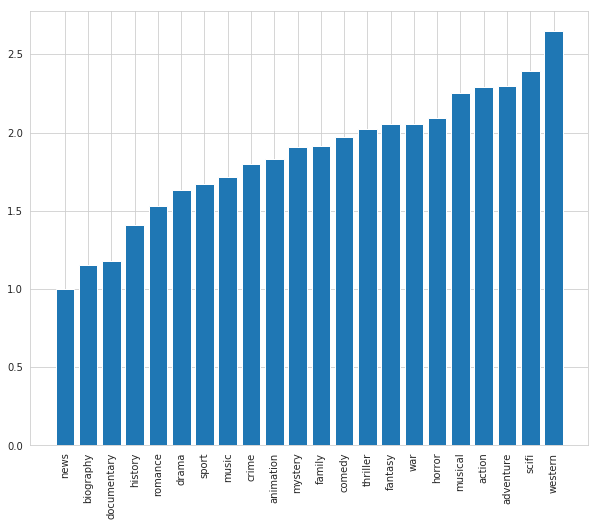

In [106]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_xticks(range(22))
ax.set_xticklabels(names_var, rotation="vertical")
plt.bar(range(22), list_var)
plt.show()

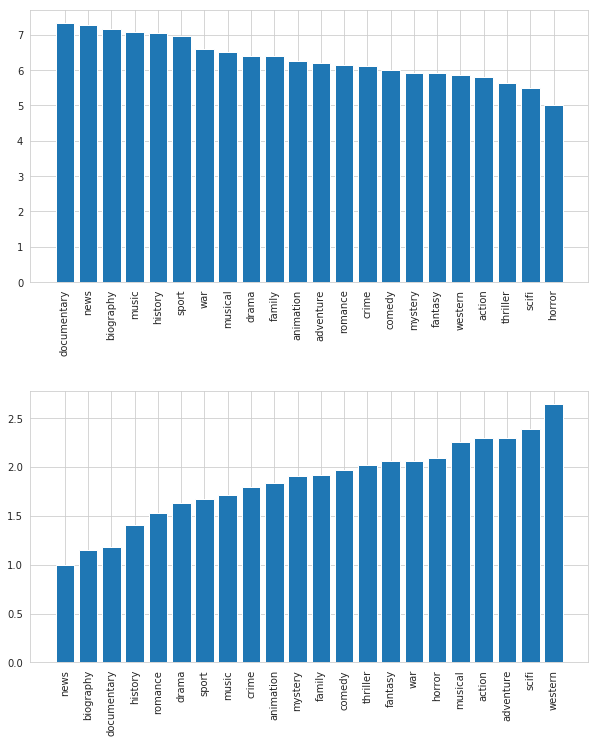

In [107]:
fig = plt.figure(figsize=(10,12))

ax = fig.add_subplot(211)
ax.set_xticks(range(22))
ax.set_xticklabels(names_mean, rotation="vertical")
plt.bar(range(22), list_mean)

ax = fig.add_subplot(212)
ax.set_xticks(range(22))
ax.set_xticklabels(names_var, rotation="vertical")
plt.bar(range(22), list_var)

plt.subplots_adjust(hspace=0.4)

plt.show()

# Best Finding so far....

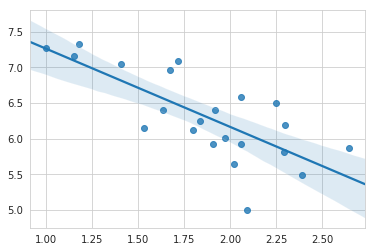

In [108]:
sns.regplot(list_movies_ave_rate_variance, list_movies_ave_rate_mean)

In [109]:
df.head()

,tconst,runtime_minutes,action,crime,drama,biography,comedy,fantasy,horror,thriller,...,western,musical,adult,news,talk_show,reality_TV,game_show,short,averagerating,numvotes
0,tt0063540,175.0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.0,77
1,tt0066787,114.0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,7.2,43
2,tt0069049,122.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.9,4517
3,tt0069204,NaN,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6.1,13
4,tt0100275,80.0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,6.5,119


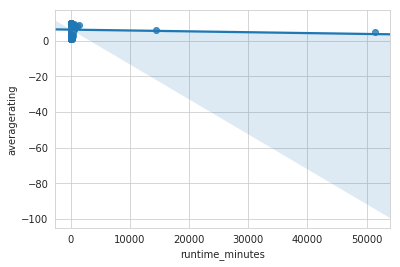

In [110]:
sns.regplot(x="runtime_minutes", y="averagerating", data=df);

In [111]:
new_df = df[df.runtime_minutes < 10000]

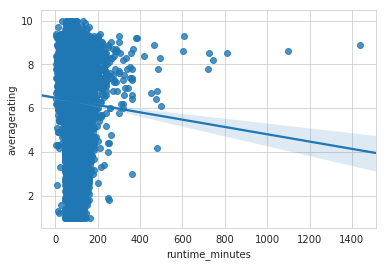

In [112]:
sns.regplot(x="runtime_minutes", y="averagerating", data=new_df);

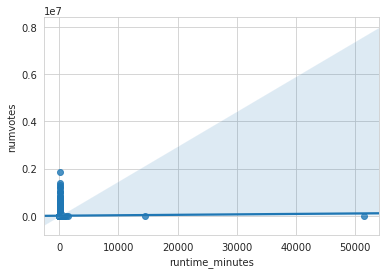

In [113]:
sns.regplot(x="runtime_minutes", y="numvotes", data=df);

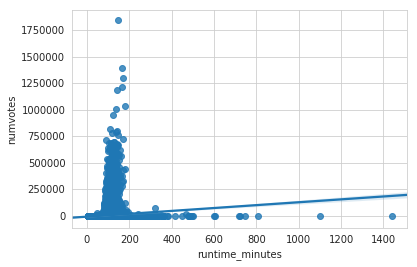

In [114]:
sns.regplot(x="runtime_minutes", y="numvotes", data=new_df);

We can see that movies lasting between approx 40 min to 200 min have the highest numvotes.

In [115]:
[short_run_movies.numvotes.mean(), short_run_movies.numvotes.std()]

[39.233415233415236, 215.74208526288655]

In [116]:
[normal_run_movies.numvotes.mean(), normal_run_movies.numvotes.std()]

[3955.3651535685462, 32098.986207401587]

In [117]:
[long_run_movies.numvotes.mean(), long_run_movies.numvotes.std()]

[930.1772151898734, 5858.445693434137]

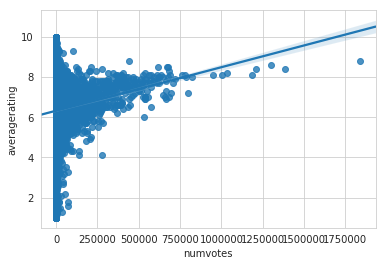

In [118]:
sns.regplot(x="numvotes", y="averagerating", data=df);

Higher numvotes, higher averagerating.

In [119]:
less_votes = df[df.numvotes <= 700]
mid_votes = df[(df.numvotes > 700) & (df.numvotes < 100000)]
more_votes = df[df.numvotes > 100000]

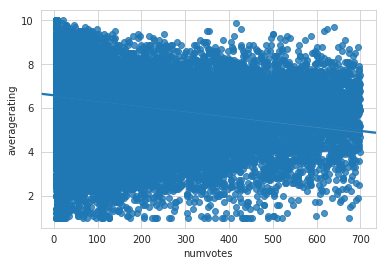

In [120]:
sns.regplot(x="numvotes", y="averagerating", data=less_votes);

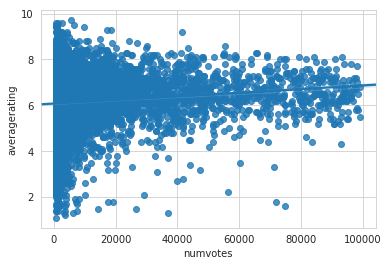

In [121]:
sns.regplot(x="numvotes", y="averagerating", data=mid_votes);

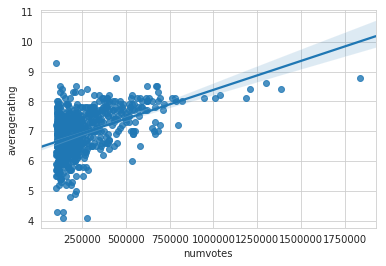

In [122]:
sns.regplot(x="numvotes", y="averagerating", data=more_votes);

In [123]:
biography_movies.numvotes.mean()

5673.259648201628

In [124]:
numvotes_mean = [action_movies.numvotes.mean(), crime_movies.numvotes.mean(),
                 drama_movies.numvotes.mean(), biography_movies.numvotes.mean(),
                 comedy_movies.numvotes.mean(), fantasy_movies.numvotes.mean(),
                 horror_movies.numvotes.mean(), thriller_movies.numvotes.mean(),
                 adventure_movies.numvotes.mean(), animation_movies.numvotes.mean(),
                 documentary_movies.numvotes.mean(), history_movies.numvotes.mean(),
                 mystery_movies.numvotes.mean(), scifi_movies.numvotes.mean(),
                 romance_movies.numvotes.mean(), family_movies.numvotes.mean(),
                 war_movies.numvotes.mean(), music_movies.numvotes.mean(),
                 sport_movies.numvotes.mean(), western_movies.numvotes.mean(),
                 musical_movies.numvotes.mean(), news_movies.numvotes.mean()]

zipped_pairs = list(zip(numvotes_mean, list_genres_names_new))
zipped_pairs.sort(reverse=True)
names_mean = []
list_mean = []
for i in zipped_pairs:
    list_mean.append(i[0])
    names_mean.append(i[1])

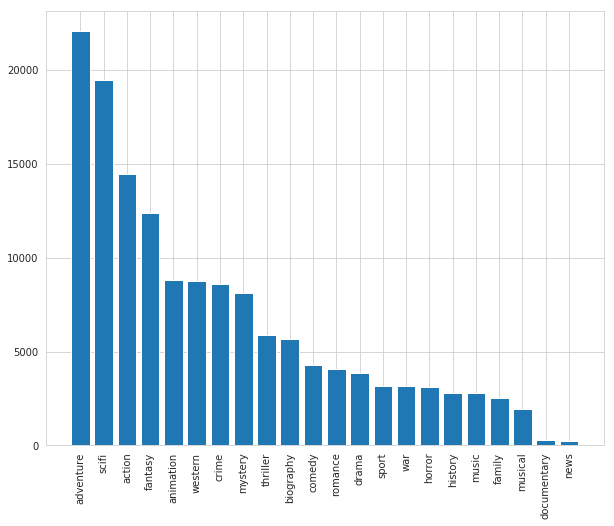

In [125]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_xticks(range(22))
ax.set_xticklabels(names_mean, rotation="vertical")
plt.bar(range(22), list_mean)
plt.show()

In [126]:
numvotes_variance = [action_movies.numvotes.var(), crime_movies.numvotes.var(),
                     drama_movies.numvotes.var(), biography_movies.numvotes.var(),
                     comedy_movies.numvotes.var(), fantasy_movies.numvotes.var(),
                     horror_movies.numvotes.var(), thriller_movies.numvotes.var(),
                     adventure_movies.numvotes.var(), animation_movies.numvotes.var(),
                     documentary_movies.numvotes.var(), history_movies.numvotes.var(),
                     mystery_movies.numvotes.var(), scifi_movies.numvotes.var(),
                     romance_movies.numvotes.var(), family_movies.numvotes.var(),
                     war_movies.numvotes.var(), music_movies.numvotes.var(),
                     sport_movies.numvotes.var(), western_movies.numvotes.var(),
                     musical_movies.numvotes.var(), news_movies.numvotes.var()]

zipped_pairs = list(zip(numvotes_variance, list_genres_names_new))
zipped_pairs.sort()
names_var = []
list_var = []
for i in zipped_pairs:
    list_var.append(i[0])
    names_var.append(i[1])

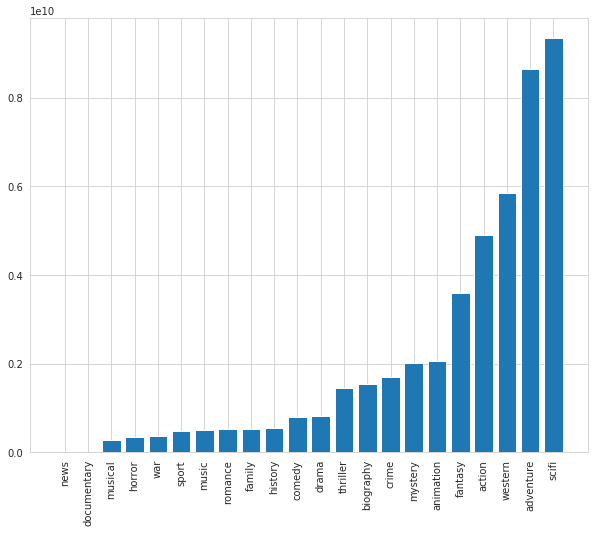

In [127]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_xticks(range(22))
ax.set_xticklabels(names_var, rotation="vertical")
plt.bar(range(22), list_var)
plt.show()

In [128]:
runtime_mean = [action_movies.runtime_minutes.mean(), crime_movies.runtime_minutes.mean(),
                drama_movies.runtime_minutes.mean(), biography_movies.runtime_minutes.mean(),
                comedy_movies.runtime_minutes.mean(), fantasy_movies.runtime_minutes.mean(),
                horror_movies.runtime_minutes.mean(), thriller_movies.runtime_minutes.mean(),
                adventure_movies.runtime_minutes.mean(), animation_movies.runtime_minutes.mean(),
                documentary_movies.runtime_minutes.mean(), history_movies.runtime_minutes.mean(),
                mystery_movies.runtime_minutes.mean(), scifi_movies.runtime_minutes.mean(),
                romance_movies.runtime_minutes.mean(), family_movies.runtime_minutes.mean(),
                war_movies.runtime_minutes.mean(), music_movies.runtime_minutes.mean(),
                sport_movies.runtime_minutes.mean(), western_movies.runtime_minutes.mean(),
                musical_movies.runtime_minutes.mean(), news_movies.runtime_minutes.mean()]

zipped_pairs = list(zip(runtime_mean, list_genres_names_new))
zipped_pairs.sort(reverse=True)
names_mean = []
list_mean = []
for i in zipped_pairs:
    list_mean.append(i[0])
    names_mean.append(i[1])

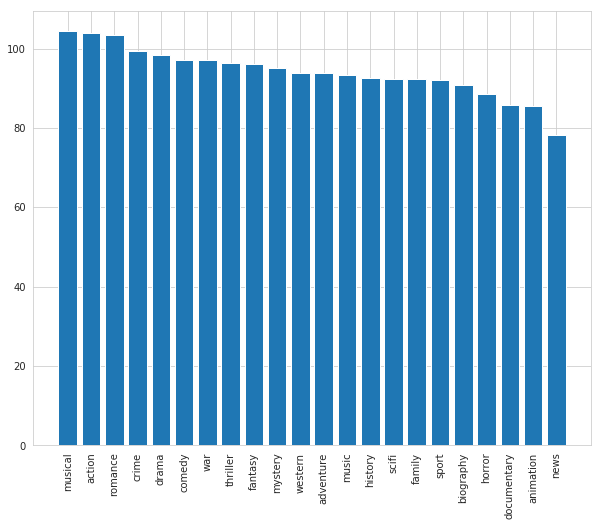

In [129]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_xticks(range(22))
ax.set_xticklabels(names_mean, rotation="vertical")
plt.bar(range(22), list_mean)
plt.show()